In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def find_template(template):
    template_arr = []
    gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, threshold = cv2.threshold(blur, 245, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(threshold, kernel, iterations=2)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 500:  
            continue
        mask = np.zeros_like(template)
        cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
        object_image = cv2.bitwise_and(template, mask)
        x, y, w, h = cv2.boundingRect(contour)
        object_image_cropped = object_image[y:y+h, x:x+w]
        template_arr.append(object_image_cropped)
    return template_arr

In [78]:
def matching_object(image, template):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    best_max_val = -1
    best_max_loc = None
    best_template = None
    best_scale = 1.0

    image_edge = cv2.Canny(image_gray, 50, 200)
    for scale in np.linspace(0.4,1.0,61):
        resize = cv2.resize(template_gray, (0,0), fx=scale, fy=scale)
        template_edge = cv2.Canny(resize, 50, 200)
        result = cv2.matchTemplate(image_edge, template_edge, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        if max_val > best_max_val:
            best_max_val = max_val
            best_max_loc = max_loc
            best_template = resize
            best_scale = scale
    h, w = best_template.shape[:2]
    top_left = best_max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image, top_left, bottom_right, 255, 5)
    return best_scale

### FINDING 15 HIDDEN OBJECTS

In [2]:
finding_15 = cv2.imread("finding_15_objects.jpg")
image_15 = finding_15[:1829,:1405]
template_15 = finding_15[900:1829, 1410:]

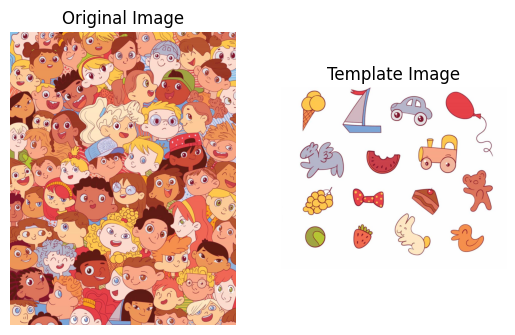

In [80]:
plt.subplot(1,2,1)
plt.imshow(image_15[:,:,::-1])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(template_15[:,:,::-1])
plt.axis('off')
plt.title('Template Image')
plt.show()

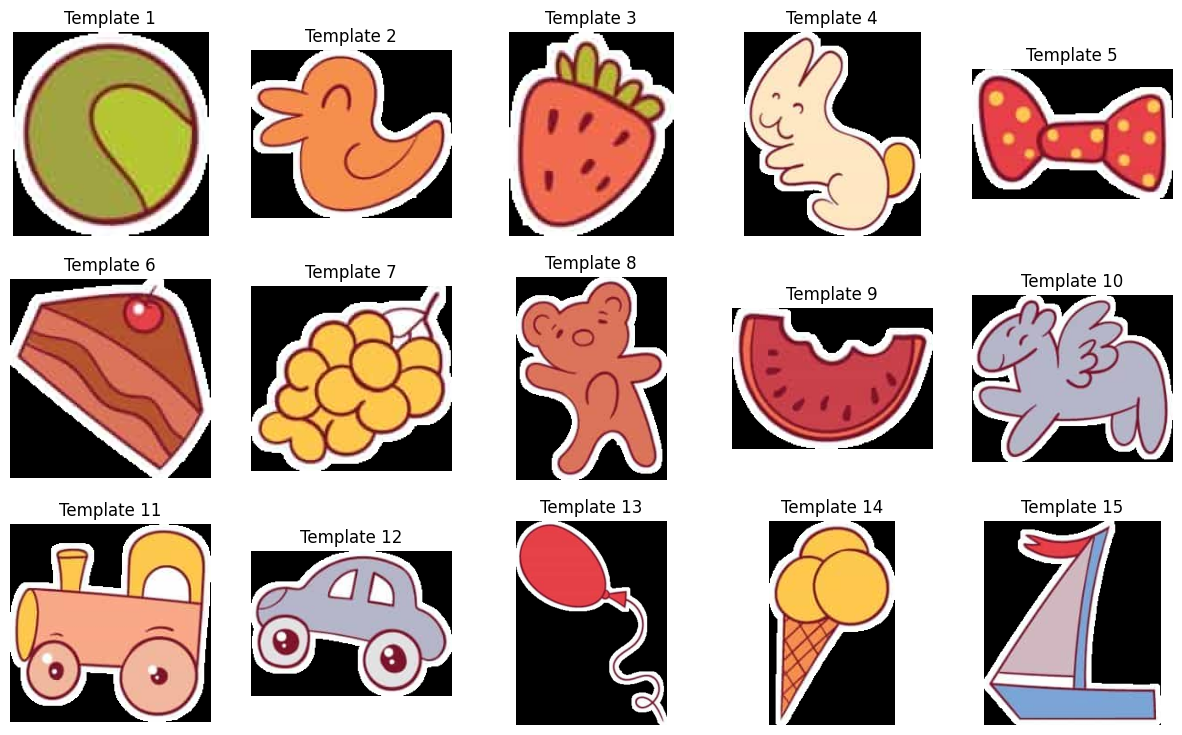

In [81]:
templates_15 = find_template(template_15)
rows = (len(templates_15) + 4) // 5 
cols = min(5, len(templates_15))
plt.figure(figsize=(15, 3 * rows))
for i, t in enumerate(templates_15):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(t[:, :, ::-1])
    plt.title(f'Template {i + 1}')
    plt.axis('off')
plt.show()

Template 1 found with best scale: 0.60
Template 2 found with best scale: 0.72
Template 3 found with best scale: 0.57
Template 4 found with best scale: 0.72
Template 5 found with best scale: 0.47
Template 6 found with best scale: 0.60
Template 7 found with best scale: 0.72
Template 8 found with best scale: 0.62
Template 9 found with best scale: 0.48
Template 10 found with best scale: 0.59
Template 11 found with best scale: 0.72
Template 12 found with best scale: 0.72
Template 13 found with best scale: 0.62
Template 14 found with best scale: 0.72
Template 15 found with best scale: 0.66


(-0.5, 1404.5, 1828.5, -0.5)

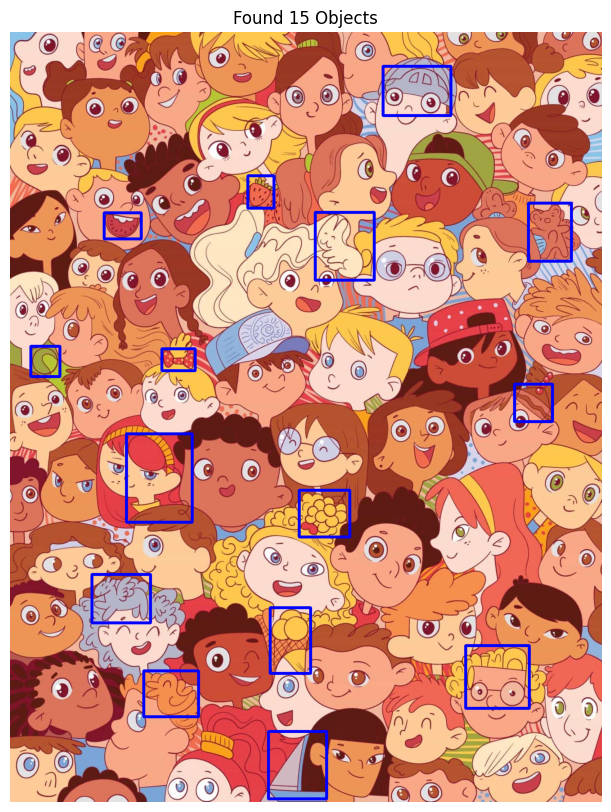

In [82]:
for i, t in enumerate(templates_15):
    scale = matching_object(image_15, t)
    print(f"Template {i + 1} found with best scale: {scale:.2f}")
plt.figure(figsize=(10, 10))
plt.imshow(image_15[:,:,::-1])
plt.title('Found 15 Objects')
plt.axis('off')

### FINDING 12 HIDDEN OBJECTS

In [83]:
finding_12 = cv2.imread("finding_12_objects.jpg")
image_12 = finding_12[230:,:1785]
template_12 = finding_12[230:,1790:]

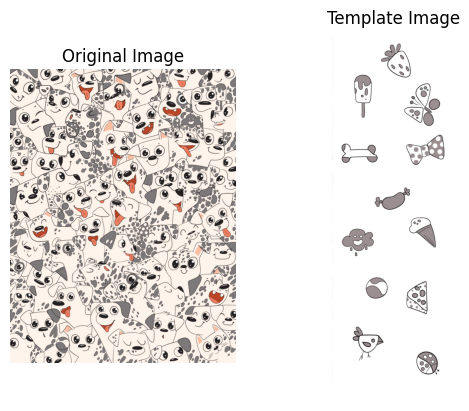

In [84]:
plt.subplot(1,2,1)
plt.imshow(image_12[:,:,::-1])
plt.axis('off')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(template_12[:,:,::-1])
plt.axis('off')
plt.title('Template Image')
plt.show()

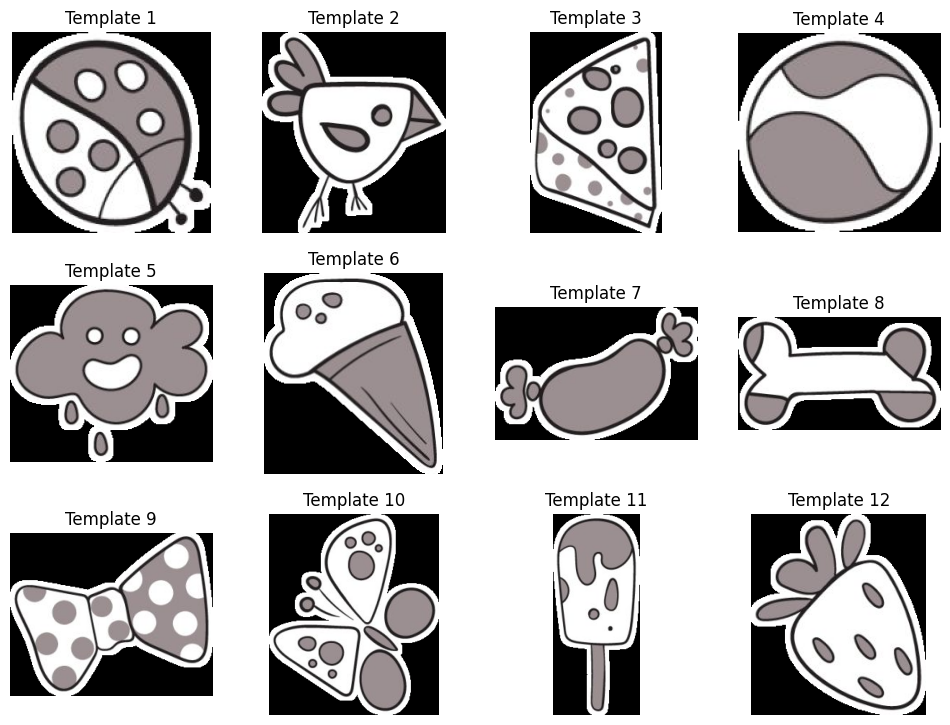

In [85]:
templates_12 = find_template(template_12)
templates_12 = [template for template in templates_12 if template.shape[1] >= 50]
rows = (len(templates_12) + 4) // 4 
cols = min(4, len(templates_12))
plt.figure(figsize=(12, 3 * rows))
for i, t in enumerate(templates_12):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(t[:, :, ::-1])
    plt.title(f'Template {i + 1}')
    plt.axis('off')
plt.show()

Template 1 found with best scale: 0.79
Template 2 found with best scale: 0.72
Template 3 found with best scale: 0.78
Template 4 found with best scale: 0.79
Template 5 found with best scale: 0.78
Template 6 found with best scale: 0.79
Template 7 found with best scale: 0.73
Template 8 found with best scale: 0.67
Template 9 found with best scale: 0.79
Template 10 found with best scale: 0.78
Template 11 found with best scale: 0.78
Template 12 found with best scale: 0.78


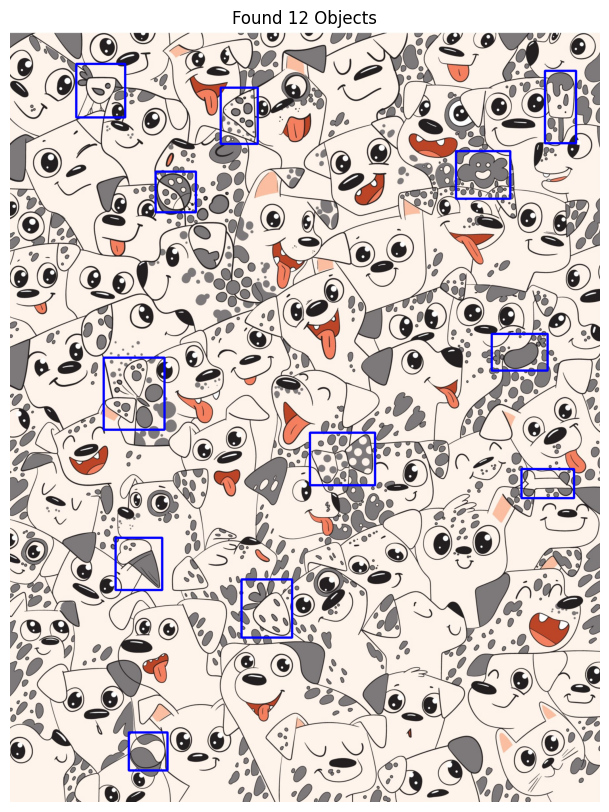

In [86]:
for i, t in enumerate(templates_12):
    scale = matching_object(image_12, t)
    print(f"Template {i + 1} found with best scale: {scale:.2f}")
plt.figure(figsize=(10, 10))
plt.imshow(image_12[:,:,::-1])
plt.title('Found 12 Objects')
plt.axis('off')
plt.show()